<h1 align = "center">Premier League</h1>
<br>

<h3 align = "center">Author - Naman Talwar<h3>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("soccer21-22.csv")
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [3]:
data.shape

(380, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
 10  HS        380 non-null    int64 
 11  AS        380 non-null    int64 
 12  HST       380 non-null    int64 
 13  AST       380 non-null    int64 
 14  HF        380 non-null    int64 
 15  AF        380 non-null    int64 
 16  HC        380 non-null    int64 
 17  AC        380 non-null    int64 
 18  HY        380 non-null    int64 
 19  AY        380 non-null    int64 
 20  HR        380 non-null    int64 
 21  AR        380 no

In [5]:
data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [6]:
data.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [7]:
data["HomeTeam"].value_counts()

Man United        19
Brighton          19
Leicester         19
Crystal Palace    19
Aston Villa       19
Leeds             19
Liverpool         19
West Ham          19
Arsenal           19
Wolves            19
Norwich           19
Southampton       19
Tottenham         19
Chelsea           19
Watford           19
Burnley           19
Newcastle         19
Brentford         19
Everton           19
Man City          19
Name: HomeTeam, dtype: int64

Text(0.5,0.98,'Goals Scored by Teams at Home')

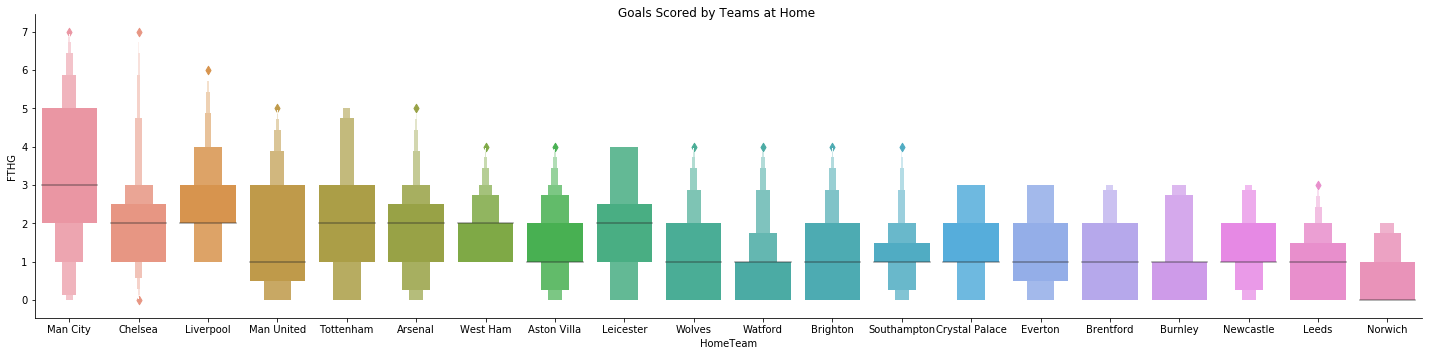

In [8]:
hg = sns.catplot(y = "FTHG",x= "HomeTeam",data = data.sort_values("FTHG",ascending = False),kind = "boxen",height = 5,aspect = 4)
hg.fig.suptitle("Goals Scored by Teams at Home")

Text(0.5,0.98,'Goals Conceded by Teams at Home')

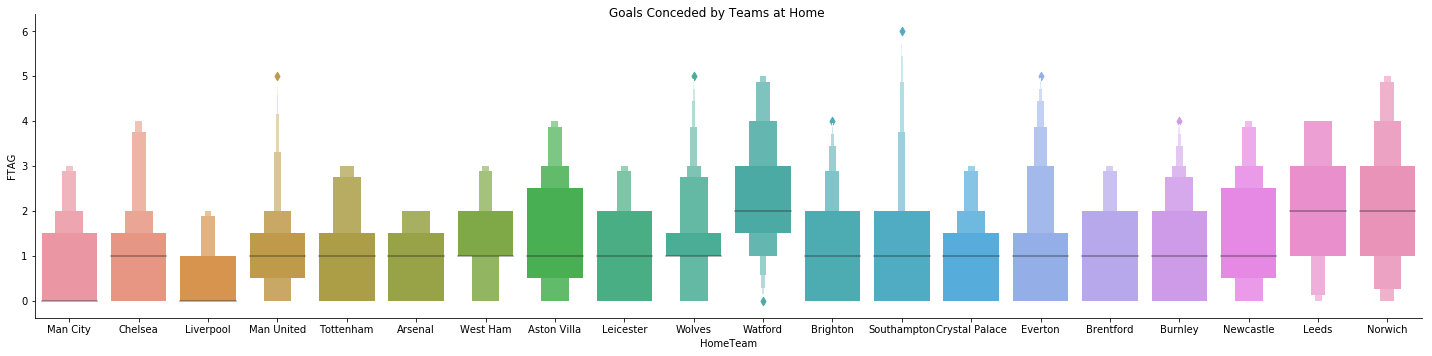

In [9]:
hc = sns.catplot(y = "FTAG",x= "HomeTeam",data = data.sort_values("FTHG",ascending = False),kind = "boxen",height = 5,aspect = 4)
hc.fig.suptitle("Goals Conceded by Teams at Home")

Text(0.5,0.98,'Goals Scored by Teams Away')

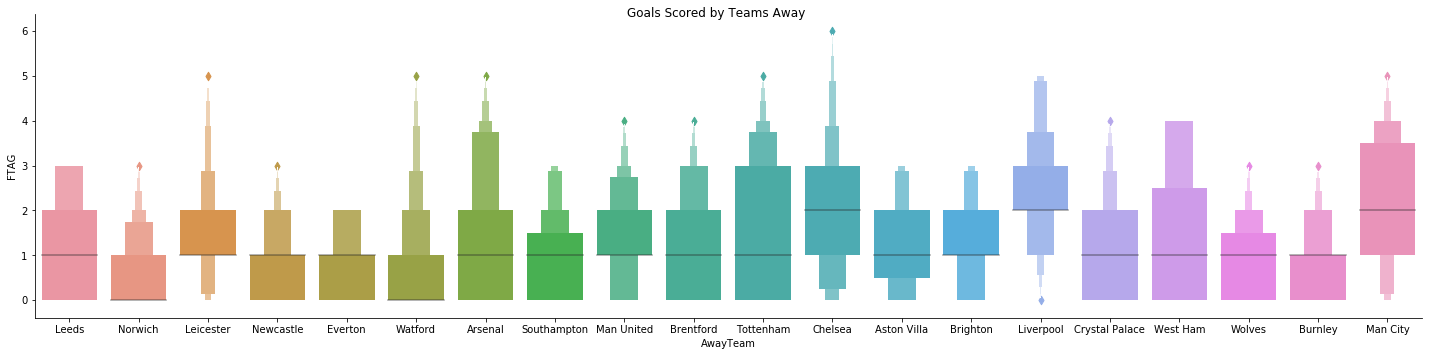

In [10]:
ag = sns.catplot(y = "FTAG",x= "AwayTeam",data = data.sort_values("FTHG",ascending = False),kind = "boxen",height = 5,aspect = 4)
ag.fig.suptitle("Goals Scored by Teams Away")

Text(0.5,0.98,'Goals Conceded by Teams Away')

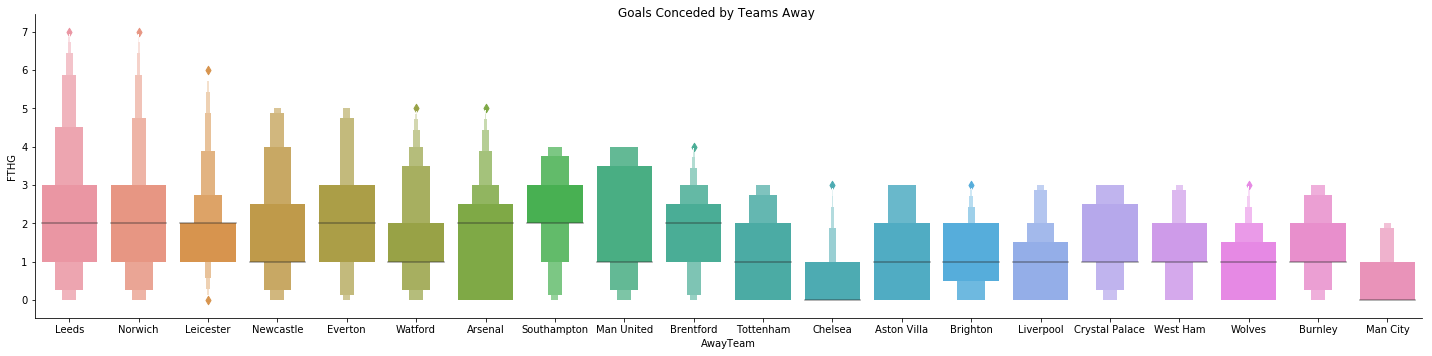

In [11]:
ac = sns.catplot(y = "FTHG",x= "AwayTeam",data = data.sort_values("FTHG",ascending = False),kind = "boxen",height = 5,aspect = 4)
ac.fig.suptitle("Goals Conceded by Teams Away")

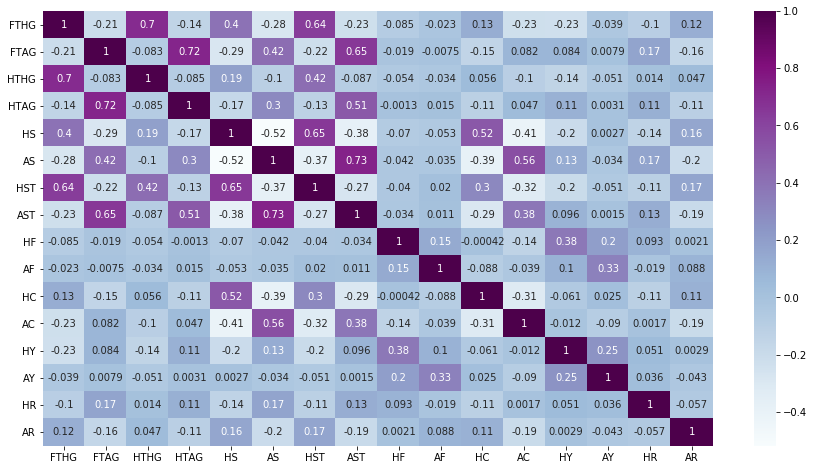

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),cmap = "BuPu",annot = True)
plt.show()

<h2>Mapping 

Since columns like "HomeTeam" and "AwayTeam" contain string values, the values cannot be used for the prediction Algorithms.

For this issue we are using mapping to map these string values to integer values and they can be used in the prediction

In [29]:
mapping = {}
cols = data.drop('FTR', axis=1).columns
for col in cols:
  mapping[col] = {name: i for i, name in enumerate(data[col].unique())}
def mapping_func(row):
  return pd.Series([mapping[col][row[col]] for col in cols])

In [31]:
X = data.apply(mapping_func, axis=1)

In [32]:
y = data["FTR"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1) 

In [38]:
print('x_train : ',len(X_train))
print('x_test : ',len(X_test))
print('y_train : ',len(y_train))
print('y_test : ',len(y_test))

x_train :  228
x_test :  152
y_train :  228
y_test :  152


<h3>Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
accuracy_score(y_test,y_pred)

Classification Report:
               precision    recall  f1-score   support

           A       0.88      1.00      0.93        49
           D       0.95      0.53      0.68        34
           H       0.83      0.93      0.88        69

    accuracy                           0.86       152
   macro avg       0.88      0.82      0.83       152
weighted avg       0.87      0.86      0.85       152

Confusion Matrix:
 [[49  0  0]
 [ 3 18 13]
 [ 4  1 64]]
Training Score:
 100.0


0.8618421052631579

<h3>K Neighbours

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [46]:
y_pred=classifier.predict(X_test)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
accuracy_score(y_test,y_pred)

Classification Report:
               precision    recall  f1-score   support

           A       0.31      0.33      0.32        49
           D       0.26      0.15      0.19        34
           H       0.48      0.57      0.52        69

    accuracy                           0.39       152
   macro avg       0.35      0.35      0.34       152
weighted avg       0.38      0.39      0.38       152

Confusion Matrix:
 [[16  9 24]
 [11  5 18]
 [25  5 39]]
Training Score:
 100.0


0.39473684210526316

<h3>Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve

In [48]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [49]:
predict=model.predict(X_test)
print("The Predicted Values on the Test Data",predict)

The Predicted Values on the Test Data ['H' 'H' 'D' 'A' 'D' 'H' 'A' 'H' 'H' 'D' 'A' 'A' 'H' 'D' 'H' 'A' 'D' 'A'
 'H' 'H' 'H' 'H' 'A' 'D' 'A' 'H' 'A' 'D' 'H' 'A' 'D' 'H' 'A' 'H' 'A' 'A'
 'D' 'H' 'A' 'A' 'H' 'D' 'H' 'D' 'A' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'H' 'H'
 'A' 'H' 'D' 'H' 'A' 'A' 'H' 'H' 'A' 'H' 'H' 'A' 'A' 'H' 'D' 'A' 'D' 'H'
 'A' 'A' 'H' 'H' 'H' 'D' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'A' 'H' 'A' 'A' 'A'
 'A' 'H' 'A' 'H' 'D' 'A' 'H' 'H' 'H' 'D' 'D' 'H' 'A' 'H' 'D' 'A' 'H' 'H'
 'D' 'H' 'H' 'A' 'D' 'H' 'D' 'H' 'A' 'H' 'A' 'H' 'H' 'H' 'A' 'A' 'H' 'H'
 'H' 'H' 'H' 'H' 'D' 'H' 'A' 'A' 'D' 'H' 'H' 'H' 'H' 'H' 'A' 'A' 'A' 'A'
 'A' 'H' 'D' 'A' 'D' 'H' 'H' 'H']


In [50]:
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

In [51]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy    : ",accuracy_score(y_test,y_test_pred))

Training Accuracy:  0.7456140350877193
Test Accuracy    :  0.6907894736842105


<h3>Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier=DecisionTreeClassifier(random_state=20)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=20)

In [53]:
y_pred=classifier.predict(X_test)

In [54]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[49  0  0]
 [ 0 34  0]
 [ 2  4 63]]


In [55]:
accuracy_score=accuracy_score(y_test,y_pred)
print("Accuracy Score:\n",accuracy_score)

Accuracy Score:
 0.9605263157894737


<h4>As we can see Decision Tree Classifier gives us the most accuracy</h4>